# Task 3: Linear Regression

## Objective:
Implement and understand simple & multiple linear regression.

## Tools:
- Scikit-learn
- Pandas
- Matplotlib

This notebook will walk through:
1. Importing and preprocessing the dataset
2. Splitting the dataset into train and test sets
3. Fitting a Linear Regression model
4. Evaluating model performance (MAE, MSE, R²)
5. Plotting regression line and interpreting coefficients


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")


In [5]:
# Step 2: Load the dataset from your local path
import pandas as pd

data = pd.read_csv(r'C:\Users\susan\Downloads\Housing.csv')

# Display the first few rows
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Basic info about the dataset
print("Dataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Convert categorical variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Show updated dataset
data.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [7]:
# Define features and target
X = data.drop('price', axis=1)
y = data['price']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (436, 13)
Testing data shape: (109, 13)


In [8]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Intercept:", model.intercept_)
print("\nCoefficients:")
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)


Intercept: 260032.35760741308

Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.664
R² Score: 0.6529242642153184


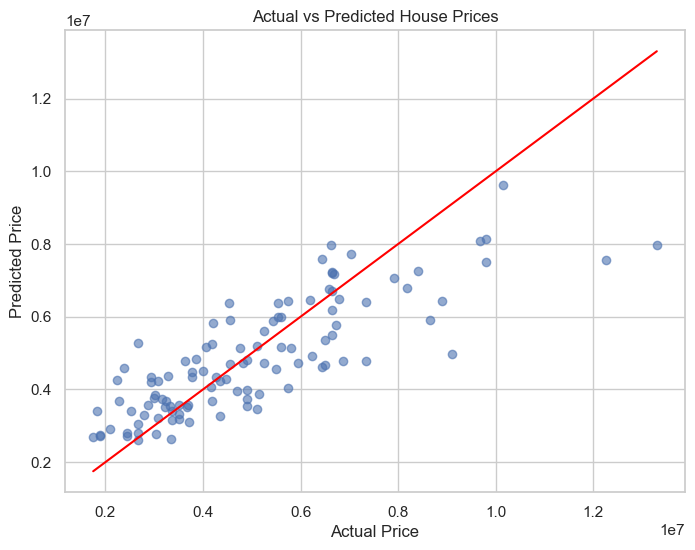

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
# Feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
